<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 2.0**
*by [sigmoidal.ai](https://sigmoidal.ai)*

---

# Análise dos Dados do Airbnb - *Valência-ESP*

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade de Valência/ESP, e ver quais insights podem ser extraídos a partir de dados brutos.**

## Obtenção dos Dados

Todos os dados usados aqui foram obtidos a partir do site [Inside Airbnb](http://insideairbnb.com/get-the-data.html).

Para esta análise exploratória inicial, será baixado apenas o seguinte arquivo:

* `listings.csv` - *Summary information and metrics for listings in Valencia (good for visualisations).*

In [3]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv("http://data.insideairbnb.com/spain/vc/valencia/2020-08-30/visualisations/listings.csv")


In [ ]:
df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,4620,VALENCIA HISTORIC HOUSE 50M BEACH,7093832,Francisca,POBLATS MARITIMS,LA MALVA-ROSA,39.475530,-0.32461,Entire home/apt,121,2,100,2020-08-09,0.98,1,163
1,48154,beautiful apartment wifi,219476,Toni,LA SAIDIA,MORVEDRE,39.485750,-0.37428,Entire home/apt,51,3,99,2020-07-31,0.82,2,365
2,55692,Delight in city center,120649,Pilar,CIUTAT VELLA,LA SEU,39.476810,-0.37523,Entire home/apt,100,1,1,2014-11-11,0.01,1,271
3,95393,Modern and bright Duplex 3 Bedrooms Center Wi-Fi,508042,Carmen,CIUTAT VELLA,EL CARME,39.477870,-0.38142,Entire home/apt,137,1,98,2019-08-10,0.87,6,264
4,100347,3BDR full Home at Sorolla station and Metro Jesús,1451371,Santiago,EXTRAMURS,ARRANCAPINS,39.459650,-0.38453,Entire home/apt,104,5,130,2020-02-15,4.39,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7501,45177630,Space 50 SOBRAS,364818675,Gabriel,EXTRAMURS,LA PETXINA,39.474250,-0.38874,Private room,120,1,0,NaN,NaN,3,365
7502,45185030,Double bedroom/Kitchen/2 Bicycles,339650067,Alex,RASCANYA,ELS ORRIOLS,39.494790,-0.36980,Private room,15,1,0,NaN,NaN,8,63
7503,45186180,Habitación Valencia centro,30390619,Michelle,LA SAIDIA,MORVEDRE,39.487010,-0.37684,Private room,30,1,0,NaN,NaN,1,362
7504,45190214,Relax,340244284,Maritza,RASCANYA,TORREFIEL,39.495370,-0.37456,Private room,25,1,0,NaN,NaN,1,364


## Análise dos Dados

O objetivo deste tópico é identificar as características avaliadas, dos imóveis disponíveis no [Aribnb]("https://www.airbnb.com.br).

**Dicionário das variáveis**

* `id` - número de identificação do imóvel
* `name` - nome do anúncio
* `host_id` - número de identificação do anfitrião da propriedade
* `neighbourhood_group` - nome da região em que a propriedade se econtra
* `neighbourhood` - nome do bairro onde a propriedade se encontra
* `latitude` - coordenada da latitude da propriedade
* `longitude` - coordenada da longitude da propriedade
* `room_type` - informa o tipo da acomodação
* `price` - preço do aluguel da acomodação
* `minimum_nights` - número mínimo de noites para a propriedade
* `number_of_reviews` - número de avaliações da acomodação
* `last_review` - data da última avaliação
* `reviews_per_month` - número de reviews por mês
* `calculated_host_listings_count` - quantidade de acomodações de um mesmo anfitrião
* `availability_365` - número de dias, dentro de 365 dias, em que a propriedade esteve disponível 

Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

In [5]:
# mostrar as 5 primeiras entradas
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,4620,VALENCIA HISTORIC HOUSE 50M BEACH,7093832,Francisca,POBLATS MARITIMS,LA MALVA-ROSA,39.47553,-0.32461,Entire home/apt,121,2,100,2020-08-09,0.98,1,163
1,48154,beautiful apartment wifi,219476,Toni,LA SAIDIA,MORVEDRE,39.48575,-0.37428,Entire home/apt,51,3,99,2020-07-31,0.82,2,365
2,55692,Delight in city center,120649,Pilar,CIUTAT VELLA,LA SEU,39.47681,-0.37523,Entire home/apt,100,1,1,2014-11-11,0.01,1,271
3,95393,Modern and bright Duplex 3 Bedrooms Center Wi-Fi,508042,Carmen,CIUTAT VELLA,EL CARME,39.47787,-0.38142,Entire home/apt,137,1,98,2019-08-10,0.87,6,264
4,100347,3BDR full Home at Sorolla station and Metro Jesús,1451371,Santiago,EXTRAMURS,ARRANCAPINS,39.45965,-0.38453,Entire home/apt,104,5,130,2020-02-15,4.39,1,0


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

Prosseguimos a análise identificando a quantidade de atributos disponíveis para avaliação e quantas entradas de imóveis contém no nosso conjunto de dados.

Esse *dataset* que é apresentado neste projeto é uma versão "resumida" de dados disponibilizados pelo **AIRBNB**.

In [6]:
# identificar o volume de dados do DataFrame
print("Entradas:\t {}".format(df.shape[0]))
print("Variáveis:\t {}\n".format(df.shape[1]))

# verificar as 5 primeiras entradas do dataset
display(df.dtypes)


Entradas:	 7506
Variáveis:	 16



id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

A quantidade e a porcentagem de valores ausentes são informações importantes de um *dataset* pois pode implicar em distorções relevantes e prejudicar a qualidade dos dados.

* As únicas colunas que contém dados nulos são as de avaliação. Essa informações pode ser interpretada tanto pelo fato de realmente não haver avaliação para uma acomodação já utilizada ou pela propriedade ser nova no site.

* Manterei esses dados por não se tratar de uma informação relevante para essa análise, assim como ela representa pouco menos de 20% da siatuação das acomodações.

In [7]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

reviews_per_month                 0.192246
last_review                       0.192246
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
minimum_nights                    0.000000
price                             0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
neighbourhood_group               0.000000
host_name                         0.000000
host_id                           0.000000
name                              0.000000
id                                0.000000
dtype: float64

### **Q3. Qual o tipo de distribuição das variáveis?** 

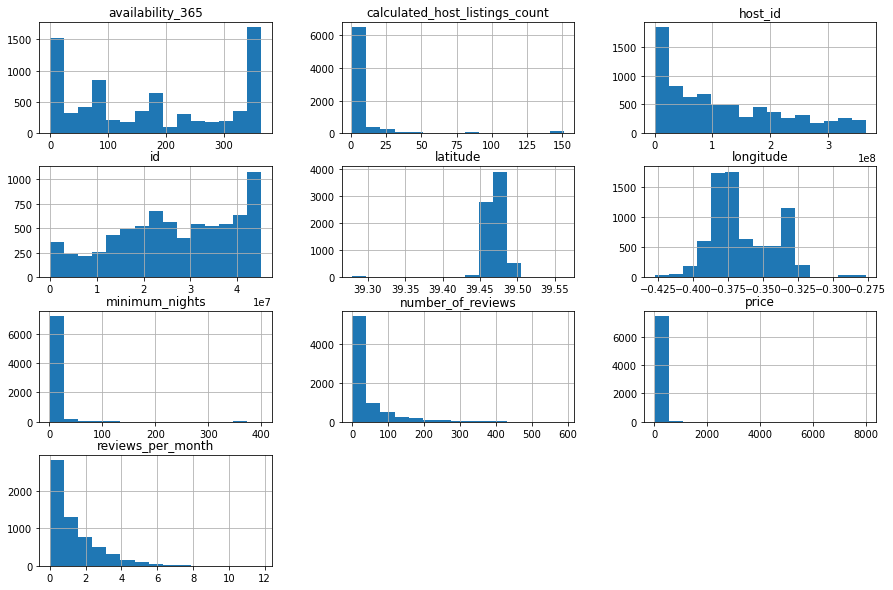

In [8]:
# plotar o histograma das variáveis numéricas
df.hist(bins=15, figsize=(15,10));

### **Q4. Qual a média dos preços de aluguel?**

Pela visualização dos dados de preço do aluguel na cidade de **Valência-ESP**, é possível observar que há *outliers*. 

In [11]:
# ver a média da coluna `price``
df[['price', 'minimum_nights']].describe()

,price,minimum_nights
count,7506.000000,7506.00000
mean,71.974021,4.61271
std,138.319853,17.13282
min,8.000000,1.00000
25%,35.000000,1.00000
50%,59.000000,2.00000
75%,85.000000,3.00000
max,8000.000000,400.00000


* Olhando o resumo estatístico acima, podemos verificar que 75% dos valores das diárias ficam abaixo de 85.00, mas há um valor máximo de 8,000.00. Portanto há uma distorção considerável na variável `preço`.

* Também verificamos que a variável `minimum_nights` está comprometida quando verificamos uma dado de necessidade de reservar por 400 noites, no mímino, determinada propriedade.



Boxplot para minimum_nights

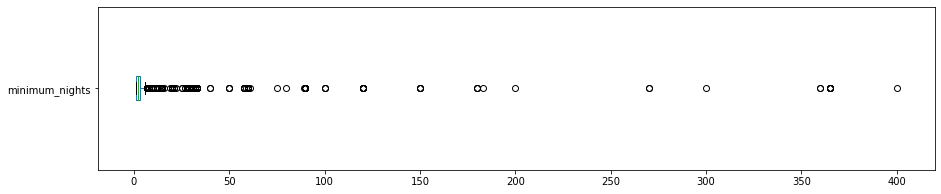

minimum_nights: valores acima de 30:
112 entradas
1.4921%


In [16]:
# minimum_nights
df.minimum_nights.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

# ver quantidades de valores acima de 30 dias para minimum_nights
print("minimum_nights: valores acima de 30:")
print("{} entradas".format(len(df[df.minimum_nights > 30])))
print("{:.4f}%".format((len(df[df.minimum_nights > 30]) / df.shape[0])*100))

Boxplot para price

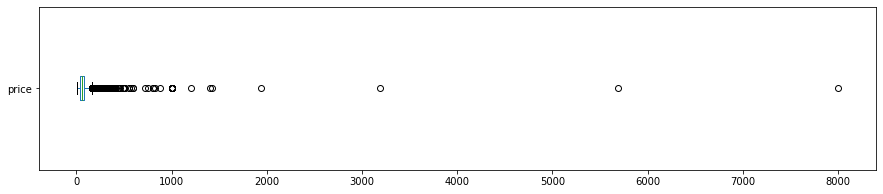


price: valores acima de 170
275 entradas
3.6637%


In [17]:
# price
df.price.plot(kind='box', vert=False, figsize=(15,3),)
plt.show()

# ver quantidade de valores acima de 170 para preço
print("\nprice: valores acima de 170")
print("{} entradas".format(len(df[df.price > 170])))
print("{:.4f}%".format((len(df[df.price > 170]) / df.shape[0])*100))

Histograma sem *outliers*

Agora que identificamos os *outliers* nas variáveis pesquisadas, vamos eliminá-las para que as informações mostradas reflitam melhor a realidade do local pesquisado.

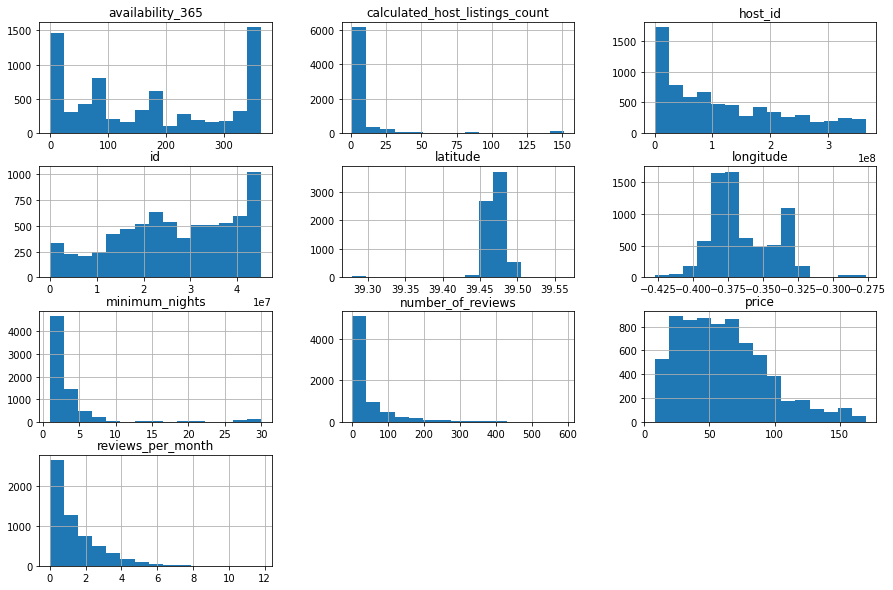

In [18]:
# remover os *outliers* em um novo Dataframe
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price > 170].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 30].index, axis=0, inplace=True)

# plotar o histograma para as variáveis numéricas
df_clean.hist(bins=15, figsize=(15,10));

### **Q4. Qual a correlação existente entre as variáveis**

Correlação significa que esxiste uma relação entre duas coisas. No nosso contexto, estamos buscando relação ou semelhança entre duas variáveis.

Essa relação pode ser medida, e é função de correlação estabelecer qual a intensidade dela. Para identificar as correlações existentes entre as variáveis de interesse, vou:

* Criar uma matriz de correlçao;
* Gerar um *heatmap* a partir dessa matriz, usando a biblioteca `seaborn`.

In [19]:
# criar uma matriz de correlação
corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']].corr()


# mostrar a matriz de correlação
display(corr)


,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,-0.063900,-0.040706,-0.134182,0.193071,0.037909
minimum_nights,-0.063900,1.000000,-0.074713,-0.117607,-0.074830,0.002454
number_of_reviews,-0.040706,-0.074713,1.000000,0.742307,-0.104517,0.019144
reviews_per_month,-0.134182,-0.117607,0.742307,1.000000,-0.149150,-0.017268
calculated_host_listings_count,0.193071,-0.074830,-0.104517,-0.149150,1.000000,0.028307
availability_365,0.037909,0.002454,0.019144,-0.017268,0.028307,1.000000


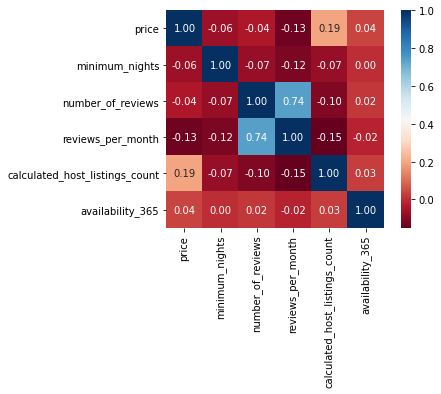

In [20]:
# plotar um heatmap a partir das correlações
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);


### **Q5. Qual o tipo de imóvel mais alugado no Airbnb?**

Vamos avaliar quais os tipos de acomodação são disponibilizadas em maior quantidade, sejam elas apartamentos inteiros, quartos avulsos ou compartilhados, casas entre outras.

In [21]:
# mostrar a quantidade de cada tipo de imóvel disponível
df_clean.room_type.value_counts()

Entire home/apt    4662
Private room       2387
Hotel room           42
Shared room          34
Name: room_type, dtype: int64

In [22]:
# mostrar a porcentagem de cada tipo de imóvel disponível
df_clean.room_type.value_counts() / df_clean.shape[0]

Entire home/apt    0.654316
Private room       0.335018
Hotel room         0.005895
Shared room        0.004772
Name: room_type, dtype: float64

### **Q6. Qual a localidade mais cara de Valência-ESP?**

Uma maneira de se verificar uma variável em função da outra é usando `groupby()`. No caso, queremos comparar os bairros a partir do preço de locação.


In [23]:
# ver preços por bairros, na média
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False) [:10]

neighbourhood
MAHUELLA-TAULADELLA    122.000000
BORBOTO                109.000000
CARPESA                103.000000
EL PERELLONET           92.349206
EL SALER                85.764706
PENYA-ROJA              83.411215
RAFALELL-VISTABELLA     79.750000
EL PLA DEL REMEI        75.884615
LA XEREA                75.383333
EL PALMAR               74.800000
Name: price, dtype: float64

In [24]:
# ver preços por região, na média
df_clean.groupby(['neighbourhood_group']).price.mean().sort_values(ascending=False) [:10]

neighbourhood_group
POBLATS DEL SUD      80.101911
CIUTAT VELLA         69.916318
POBLATS MARITIMS     69.525932
L'EIXAMPLE           66.216763
EXTRAMURS            59.379487
CAMPANAR             59.000000
CAMINS AL GRAU       56.943860
EL PLA DEL REAL      54.283582
POBLATS DE L'OEST    52.652174
POBLATS DEL NORD     52.111111
Name: price, dtype: float64

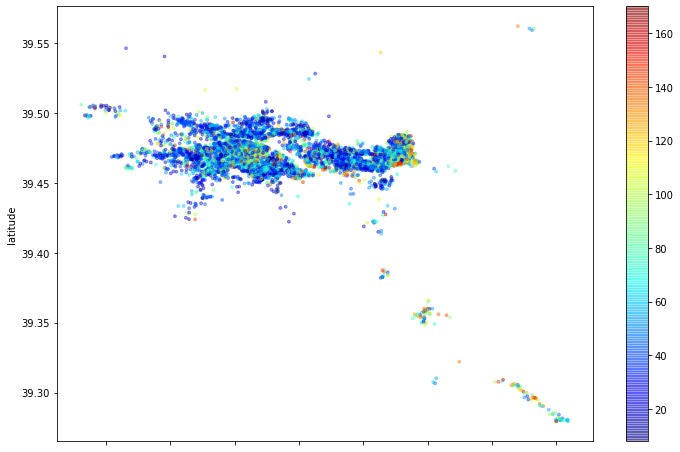

In [25]:
# plotar os imóveis pela latitude-longitude
df_clean.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=8, cmap=plt.get_cmap('jet'), figsize=(12,8));

### **Q7. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

Depois de fazer a remoção dos valores > 30 dias de estadia mínima, a média do mínimo de noites para se alugar uma acomodação em **Valência-ESP** é de 3 noites.

In [26]:
# ver a média da coluna `minimum_nights`
df_clean[['minimum_nights']].describe()

,minimum_nights
count,7125.000000
mean,3.174737
std,4.592176
min,1.000000
25%,1.000000
50%,2.000000
75%,3.000000
max,30.000000


## Conclusões

Foi feita uma análise rápida sobre os dados de acomodação na cidade de **Valência-ESP**, disponibilizadas pelo [Airbnb](https://www.airbnb.com.br/). Esses dados foram extraídos do portal [Inside Airbnb](https://insideairbnb.com/get-the-data.html).

Na etapa inicial da análise dos dados, verificou-se que haviam *inputs* que comprometiam a qualidade da avaliação, causando distorções que não refletiam a realidade da informação.
Diante dessa constatação, foi feita a remoção dos *outliers*.

Como informação adicional, essa análise foi efetuada com um arquivo contendo apenas algumas informações disponibilizadas por se tratar de uma análise primária. Futuramente será disponibilizada uma análise mais aprofundada, com adições de outros atributos.